In [46]:
%run pathtodata.py

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import utils

from keras.utils import np_utils
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM

/Users/david/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [33]:
import os
file_path = os.path.join('Data', 'poloniex_usdt_pairs30min.csv')
hipso = str(os.getcwd()).split('/')
path = ''
for i in hipso:
    path += i
    path += '/'
    if i == 'Cryptorion':
        path += 'Data'
        break

In [47]:
file_path = os.path.join(pathtodata(), 'poloniex_usdt_pairs30min.csv')

In [36]:
#file_path
pdf = pd.read_csv(file_path)

In [37]:
list_t = []
for i in list(pdf):
    if '1' not in i:
        list_t.append(i)
new_pd = pdf.loc[:,list_t]
new_df = new_pd.iloc[1:-3,:10].set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))

/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


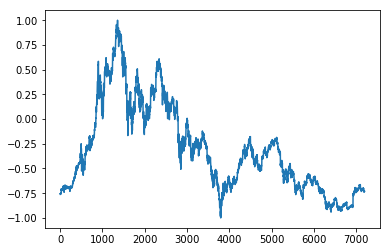

In [23]:
scaler = MinMaxScaler(feature_range=(-1,1))
plt.plot(scaler.fit_transform(new_df.iloc[:,1]))

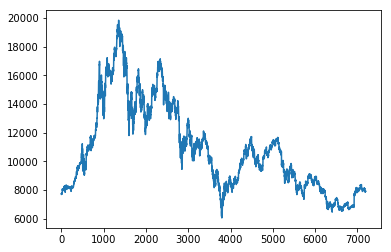

In [22]:
plt.plot(new_df.iloc[:,1])

In [41]:
new_df['USDT_BCH'][new_df['USDT_BCH'] < 0]

Series([], Name: USDT_BCH, dtype: float64)

In [99]:
from scipy.stats import boxcox
new_dfs = new_df.drop(['USDT_BCH'], axis=1)
new_dfs = new_dfs.replace(np.nan,0).apply(lambda x: boxcox(x, lmbda=0.0))
#boxcox(new_df.iloc[:,1])

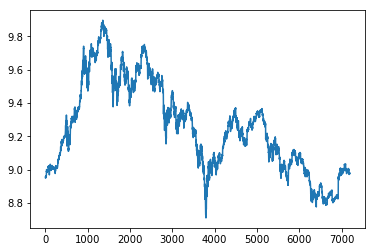

In [111]:
plt.plot(new_dfs.iloc[:,1])

In [112]:
new_dfs.shape

(7195, 8)

In [130]:

train = new_dfs.iloc[0:6800,:14]
test = new_dfs.iloc[6800:,:14]

scaler_x=MinMaxScaler(feature_range=(-1,1))
scaler_y=MinMaxScaler(feature_range=(-1,1))


train_X, train_y = scaler_x.fit_transform(np.array(train.iloc[:, 2:9])), scaler_y.fit_transform(np.array(train.iloc[:, 1]))
test_X, test_y = scaler_x.fit_transform(np.array(test.iloc[:, 2:9])), scaler_y.fit_transform(np.array(test.iloc[:, 1]))


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(6800, 1, 6) (6800,) (395, 1, 6) (395,)


/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [142]:
model = Sequential()
model.add(LSTM(256, activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(train_X.shape[1],train_X.shape[2]) ))#(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))

#model.add(LSTM(5))
model.add(Dense(50, activation='relu'))
#model.add(LSTM(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=12, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(256, activation="tanh", input_shape=(1, 6), recurrent_activation="hard_sigmoid")`
  


Train on 6800 samples, validate on 395 samples
Epoch 1/12
 - 3s - loss: 0.1845 - acc: 0.0000e+00 - val_loss: 0.2127 - val_acc: 0.0025
Epoch 2/12
 - 1s - loss: 0.1374 - acc: 0.0000e+00 - val_loss: 0.1456 - val_acc: 0.0025
Epoch 3/12
 - 1s - loss: 0.0926 - acc: 0.0000e+00 - val_loss: 0.0814 - val_acc: 0.0051
Epoch 4/12
 - 1s - loss: 0.0822 - acc: 0.0000e+00 - val_loss: 0.1048 - val_acc: 0.0025
Epoch 5/12
 - 2s - loss: 0.0784 - acc: 0.0000e+00 - val_loss: 0.1008 - val_acc: 0.0025
Epoch 6/12
 - 2s - loss: 0.0771 - acc: 0.0000e+00 - val_loss: 0.0965 - val_acc: 0.0025
Epoch 7/12
 - 2s - loss: 0.0738 - acc: 0.0000e+00 - val_loss: 0.1019 - val_acc: 0.0025
Epoch 8/12
 - 2s - loss: 0.0725 - acc: 0.0000e+00 - val_loss: 0.1084 - val_acc: 0.0025
Epoch 9/12
 - 2s - loss: 0.0696 - acc: 0.0000e+00 - val_loss: 0.1060 - val_acc: 0.0025
Epoch 10/12
 - 2s - loss: 0.0715 - acc: 0.0000e+00 - val_loss: 0.1337 - val_acc: 0.0025
Epoch 11/12
 - 1s - loss: 0.0693 - acc: 1.4706e-04 - val_loss: 0.0971 - val_acc: 0

In [143]:
# 4. evaluate the network
loss, accuracy = model.evaluate(train_X, train_y)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

6800/6800 [==============================] - 1s 125us/step

Loss: 0.06, Accuracy: 0.01%


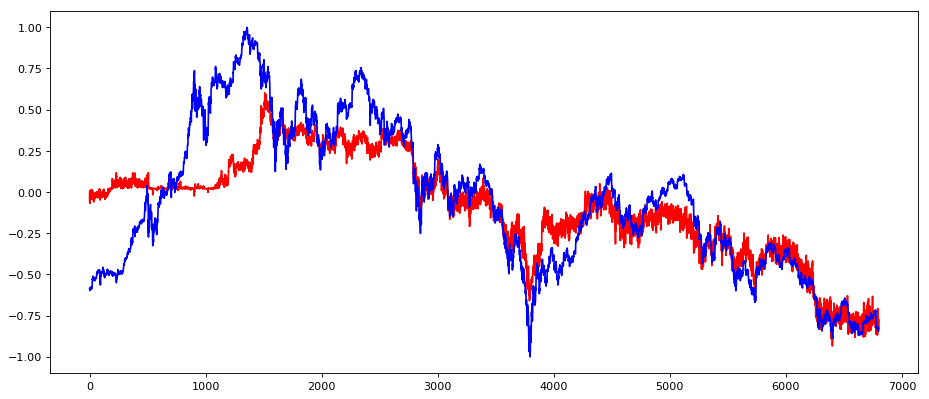

In [144]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
trainpredict=model.predict(train_X)
testpredict=model.predict(test_X)
plt.plot(trainpredict, color='red')
plt.plot(train_y,color='blue')

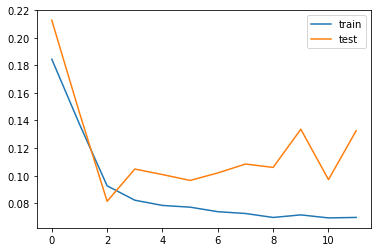

In [145]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

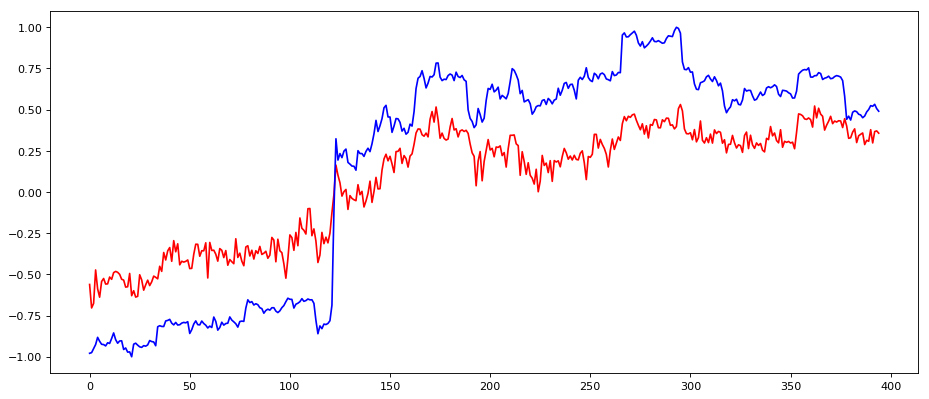

In [146]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(testpredict, color='red')
plt.plot(test_y,color='blue')

In [147]:
pdf = pd.read_csv('Data/poloniex_usdt_pairs.csv')

/Users/david/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [181]:
pdf.iloc[107300:107400,:]

,Unnamed: 0,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_BCH,USDT_BCH.1,USDT_BCH.2,...,USDT_ZEC.2,USDT_DASH,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2
107300,2018-01-08 13:35:00,54.1477,799583,14766.7,49301.6,118768,2.40901,33.319,78566.4,2358.01,...,636.955,3.23018,3492.15,1081.1,70277.8,33747.2,0.480198,311.751,25567.7,82.0133
107301,2018-01-08 13:40:00,113.364,1.66916e+06,14723.9,274484,651676,2.37419,130.432,307040,2354.03,...,628.063,27.5728,29584.3,1072.95,112804,53449.7,0.473826,607.898,49253,81.0218
107302,2018-01-08 13:45:00,49.4682,726339,14682.9,92485,218163,2.3589,67.6414,159210,2353.73,...,633.826,9.32652,9927.7,1064.46,108753,51115,0.470009,117.371,9608.39,81.8634
107303,2018-01-08 13:50:00,70.8525,1.03731e+06,14640.5,57214.9,135218,2.36334,29.3729,69122.4,2353.28,...,634.912,16.7842,17796.9,1060.33,76866.7,35971.6,0.467974,490.431,40944.6,83.4869
107304,2018-01-08 13:55:00,39.943,590498,14783.5,88846.4,210407,2.36821,12.5882,29823.3,2369.16,...,641.084,12.1624,12983.5,1067.52,35210.2,16673,0.473529,72.8883,6117.16,83.9251
107305,2018-01-08 14:00:00,43.0873,635632,14752.2,80761.8,193478,2.39566,26.1107,61730.1,2364.17,...,638.396,17.4493,18564,1063.88,44530,21135.1,0.474625,320.537,26795.2,83.5946
107306,2018-01-08 14:05:00,70.4845,1.03265e+06,14650.8,65065.8,153662,2.36164,130.73,309331,2366.17,...,633.075,96.3947,101338,1051.29,39115.5,18204,0.465392,135.256,11169.9,82.5831
107307,2018-01-08 14:10:00,97.6952,1.423e+06,14565.7,82186,191386,2.32869,43.2275,101693,2352.5,...,624.383,68.6395,71863,1046.96,33413.8,15416.1,0.461368,732.369,58613.8,80.0332
107308,2018-01-08 14:15:00,52.455,772835,14733.3,146581,344918,2.3531,34.3954,81113.1,2358.25,...,630.717,77.3892,81105.7,1048.02,50113.9,23392,0.466776,159.243,13083.6,82.1614
107309,2018-01-08 14:20:00,54.8086,803650,14662.8,119564,280068,2.34242,36.2453,85138.2,2348.94,...,628.593,8.0625,8444.01,1047.32,38002.4,17564,0.462182,230.587,18783.4,81.459


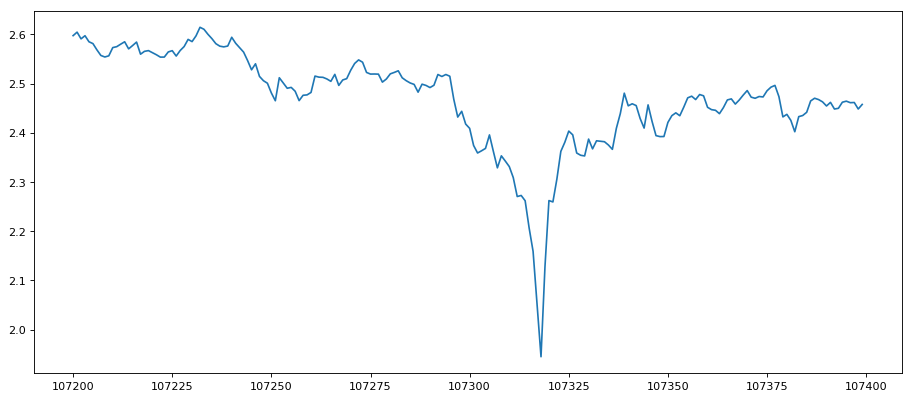

In [179]:
scalar = MinMaxScaler(feature_range=(-1,1))
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(scaler.fit_transform(pdf.iloc[105000:110000,3]))
plt.plot(pdf.iloc[107200:107400,6])

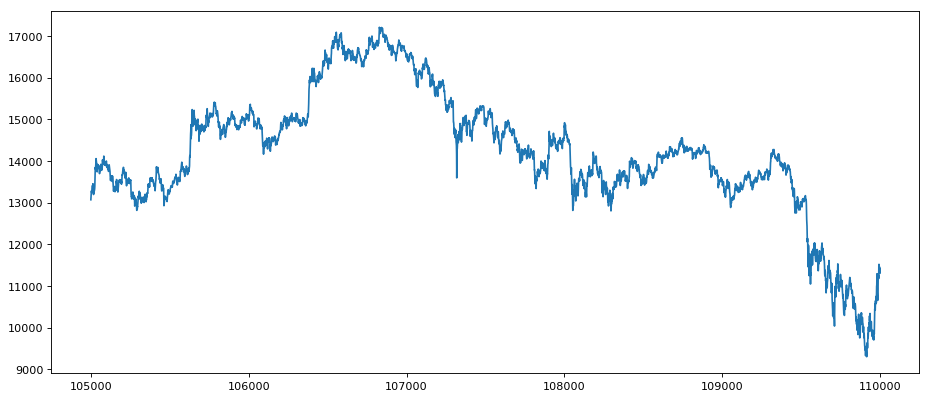

In [174]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pdf.iloc[105000:110000,3])

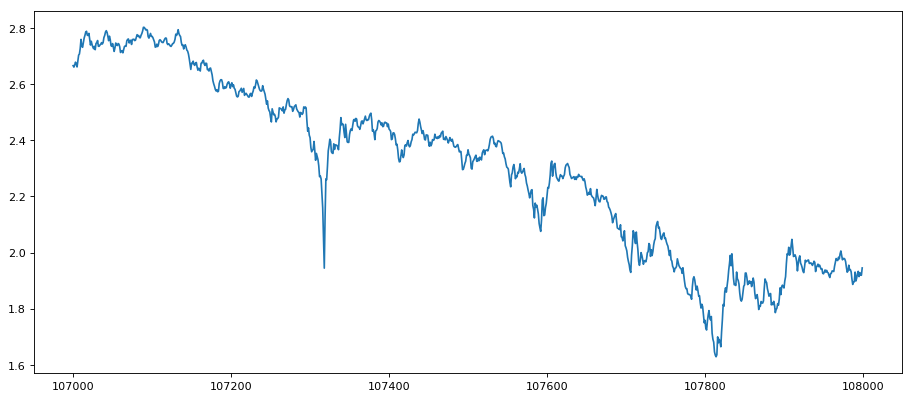

In [177]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(scaler.fit_transform(pdf.iloc[105000:110000,3]))
plt.plot(pdf.iloc[107000:108000,6])

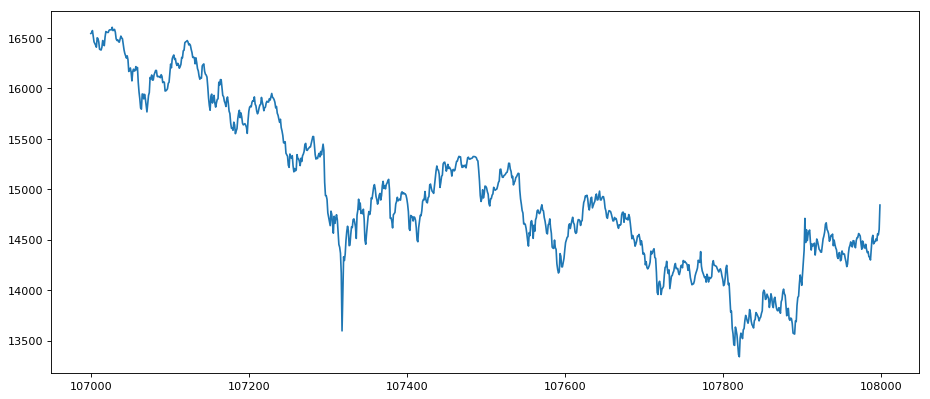

In [178]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pdf.iloc[107000:108000,3])